## FbProhet 
- 시계열분석
- 참고 링크 : https://www.facebook.com/gpa/facebook-protect

In [1]:
# import necessary libraries
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
#from plotnine import *
import io
# to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

Importing plotly failed. Interactive plots will not work.


pip install prophet
pip install fbprophet

no module 

pip install 모듈 

3.6 버전 
- 본인 파이썬 버전 체크하고 
- 버전 업그레이드를 해야 한다.

In [3]:
df = pd.read_csv('sales_data.csv', encoding='unicode_escape')

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### prophet은 

1. 변수가 필요없다. 
2. 시계열과 y값(예측값)만 필요하다.

- prophet을 사용할 때 특정 컬럼으로 만들어야 함!


### 실제로 미래의 값을 예측해서 미래가 정말 그 값이 나오는지 확인해보자!

In [7]:
import pandas as pd

In [8]:
pd.to_datetime(df['InvoiceDate'])

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### sales data _ 총 주문을  예측해 보자!

In [13]:
df_1=df.copy()

In [17]:
df_1 =df_1[df_1.Quantity >0] #수량이 -마이너스 제거 

In [18]:
df_1 = df_1[df_1.UnitPrice >0]

In [21]:
df_1['Q_price'] = df_1['Quantity'] * df_1['UnitPrice']

In [22]:
df_1 #총 주문 예측

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Q_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [25]:
df_1= df_1[['InvoiceDate','Q_price']] # 두 가지 변수로만 가지고 시계열을 예측한다!

In [29]:
##프로펫은 컬럼의 이름을 바꿔줘야 한다!
# 필수과정 
# 시계열값은 ds, 예측값(내가 예측하고 싶은 값, y) y

df_1.rename(columns={'InvoiceDate':'ds','Q_price':'y'},inplace=True)

In [30]:
df_1

,ds,y
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34
...,...,...
541904,2011-12-09 12:50:00,10.20
541905,2011-12-09 12:50:00,12.60
541906,2011-12-09 12:50:00,16.60
541907,2011-12-09 12:50:00,16.60


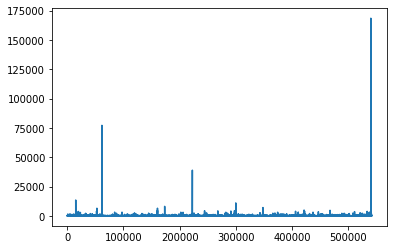

In [32]:
df_1.y.plot()
## 축을 조정해서 트렌드가 어떤 경향을 보이는지 꼭 체크하기
## 시계열데이터는 결국 과거에 대한 패턴을 학습하여 미래를 예측 
## 과거 데이터로 지금까지 트렌드가 우상향하는 증가인지, 감소하는지 
## 실제값이 나왔을 때 트렌드와 함께 비교해서 맞는지?

In [39]:
df_1 = df_1.set_index('ds') 

In [42]:
df_2 = df_1.resample('D').sum()

In [43]:
df_2 #인덱스를 풀어야 합니다! 꼭

,y
ds,
2010-12-01,58960.79
2010-12-02,47748.38
2010-12-03,46943.71
2010-12-04,0.00
2010-12-05,31774.95
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


In [54]:
df_2.reset_index(inplace=True)

In [55]:
# train, test 나눠야 한다.
train = df_2[:270]
test = df_2[270:]

In [56]:
## 프로펫으로 시계열 분석을 진행해보자!
prophet = Prophet(daily_seasonality = True,
                 growth='linear')

prophet.fit(train)

23:50:22 - cmdstanpy - INFO - Chain [1] start processing
23:50:22 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
future =prophet.make_future_dataframe(periods=30) #뒤에 얼마나 예측할 것인가?
forecast = prophet.predict(future)

In [63]:
forecast[['ds','yhat']][270:300] #실제 프로펫이 예측한 값

,ds,yhat
270,2011-08-28,13512.984836
271,2011-08-29,27025.277540
272,2011-08-30,38184.885728
273,2011-08-31,29602.528836
274,2011-09-01,36325.920777
275,2011-09-02,26810.458111
276,2011-09-03,1644.211744
277,2011-09-04,13634.179873
278,2011-09-05,27146.472578
279,2011-09-06,38306.080766


In [64]:
df_2[270:300]

,ds,y
270,2011-08-28,10805.030
271,2011-08-29,0.000
272,2011-08-30,31866.310
273,2011-08-31,25380.170
274,2011-09-01,37370.150
275,2011-09-02,42322.020
276,2011-09-03,0.000
277,2011-09-04,17119.590
278,2011-09-05,37157.140
279,2011-09-06,28349.910


## 필수과제 
- prophet에 대한 파라미터를 모두 다 정리해 주시고
- 실제 파라미터를 넣어서 예측값을 고도화 시켜주세요
- 모두 예측값을 만들어서 실제값과 비교해서 오차율을 계산해 주세요. (오차율계산법 확인)
- 기본으로만 사용했던 prophet 예측값과, 실제 파라미터를 튜닝햇을때 예측값을 비교하고
- 어떤 파라미터가 실제값에 영향을 주었는지 정리하고 발표해 주세요!

In [59]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,52603.290892,16533.469796,49735.598352,52603.290892,52603.290892,-20333.809274,-20333.809274,-20333.809274,-25206.871313,-25206.871313,-25206.871313,4873.062040,4873.062040,4873.062040,0.0,0.0,0.0,32269.481618
1,2010-12-02,52472.046320,24664.715036,54325.168278,52472.046320,52472.046320,-13627.730909,-13627.730909,-13627.730909,-25206.871313,-25206.871313,-25206.871313,11579.140404,11579.140404,11579.140404,0.0,0.0,0.0,38844.315412
2,2010-12-03,52340.801749,13571.437187,45277.256697,52340.801749,52340.801749,-23160.507152,-23160.507152,-23160.507152,-25206.871313,-25206.871313,-25206.871313,2046.364162,2046.364162,2046.364162,0.0,0.0,0.0,29180.294597
3,2010-12-04,52209.557178,-11962.016952,21335.270596,52209.557178,52209.557178,-48344.067096,-48344.067096,-48344.067096,-25206.871313,-25206.871313,-25206.871313,-23137.195783,-23137.195783,-23137.195783,0.0,0.0,0.0,3865.490082
4,2010-12-05,52078.312606,-680.955230,31276.672240,52078.312606,52078.312606,-36371.412543,-36371.412543,-36371.412543,-25206.871313,-25206.871313,-25206.871313,-11164.541230,-11164.541230,-11164.541230,0.0,0.0,0.0,15706.900063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2011-09-22,50317.236799,21422.076033,52530.521010,50098.533025,50520.881218,-13627.730909,-13627.730909,-13627.730909,-25206.871313,-25206.871313,-25206.871313,11579.140404,11579.140404,11579.140404,0.0,0.0,0.0,36689.505890
296,2011-09-23,50334.550376,11404.039696,43062.196597,50102.975874,50548.064419,-23160.507152,-23160.507152,-23160.507152,-25206.871313,-25206.871313,-25206.871313,2046.364162,2046.364162,2046.364162,0.0,0.0,0.0,27174.043224
297,2011-09-24,50351.863953,-13370.238265,18221.740521,50107.056306,50578.117080,-48344.067096,-48344.067096,-48344.067096,-25206.871313,-25206.871313,-25206.871313,-23137.195783,-23137.195783,-23137.195783,0.0,0.0,0.0,2007.796857
298,2011-09-25,50369.177529,-1345.022152,29929.772282,50108.908082,50607.847663,-36371.412543,-36371.412543,-36371.412543,-25206.871313,-25206.871313,-25206.871313,-11164.541230,-11164.541230,-11164.541230,0.0,0.0,0.0,13997.764986
